# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 Predicting loan defaults is vital for banks, particularly in adhering to the Equal Credit Opportunity Act's guidelines, as a significant portion of their profits is derived from home loans. Automating this process through machine learning enhances efficiency and aligns with industry trends, promoting data-driven and equitable credit assessment practices.

### **The objective:**

 - What is the intended goal?

The intended goal is to develop a classification model capable of predicting clients likely to default on their loans, following the guidelines of the Equal Credit Opportunity Act, and to provide the bank with actionable recommendations based on key features for more informed loan approval decisions.
### **The key questions:**

- What are the key questions that need to be answered?

The key questions involve assessing the model's accuracy in predicting loan defaults, its compliance with the Equal Credit Opportunity Act guidelines for fair loan approval, and understanding the key features influencing predictions. Additionally, we need to evaluate the relevance of the recommendations provided by the model to the bank for making informed loan approval decisions and assess the model's interpretability for justifying adverse behaviors or rejections in the loan approval process.

### **The problem formulation**:

- What is it that we are trying to solve using data science?

The objective is to employ data science for predicting loan defaults in home equity loans, utilizing various classification models such as Logistic Regression, Decision Trees, and Random Forests. The goal is to determine the most effective model, adhering to the guidelines of the Equal Credit Opportunity Act, to enhance the efficiency and accuracy of loan approval decisions for risk management and financial stability.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
hm=pd.read_csv("hmeq.csv")
data=hm.copy()

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [4]:
# Reading the dataset
hm = pd.read_csv("hmeq.csv")

# Displaying the first few rows
print("First Few Rows:")
print(hm.head())

# Displaying the last few rows
print("\nLast Few Rows:")
print(hm.tail())

# Understanding the shape of the dataset
print("\nShape of the dataset:", hm.shape)

# Checking the data types
print("\nData Types:")
print(hm.dtypes)

# Checking for missing values
print("\nMissing Values:")
print(hm.isnull().sum())

# Checking for duplicated values
print("\nDuplicated Values:", hm.duplicated().sum())


First Few Rows:
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  

Last Few Rows:
      BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958   

## Summary Statistics

In [5]:
print("\nSummary Statistics:")
print(hm.describe())


Summary Statistics:
               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092 

- Observations from Summary Statistics

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**



Range of Loan Amount (LOAN): 88800


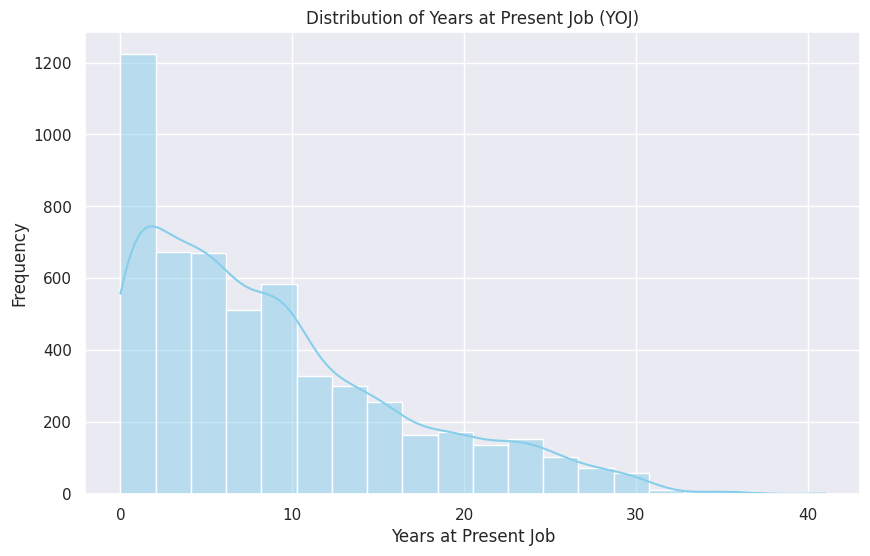


Number of Unique Categories in REASON: 2

Most Common Category in JOB: Other


In [6]:
# Univariate Analysis

# Range of Loan Amount ("LOAN")
loan_range = hm['LOAN'].max() - hm['LOAN'].min()
print("\nRange of Loan Amount (LOAN):", loan_range)

# Distribution of Years at Present Job ("YOJ")
plt.figure(figsize=(10, 6))
sns.histplot(hm['YOJ'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Years at Present Job (YOJ)')
plt.xlabel('Years at Present Job')
plt.ylabel('Frequency')
plt.show()

# Number of Unique Categories in "REASON" Variable
unique_reason_categories = hm['REASON'].nunique()
print("\nNumber of Unique Categories in REASON:", unique_reason_categories)

# Most Common Category in "JOB" Variable
most_common_job_category = hm['JOB'].mode().values[0]
print("\nMost Common Category in JOB:", most_common_job_category)


### **Bivariate Analysis**


Relationship between REASON and Loan Default Rate:
REASON
DebtCon    0.189664
HomeImp    0.222472
Name: BAD, dtype: float64


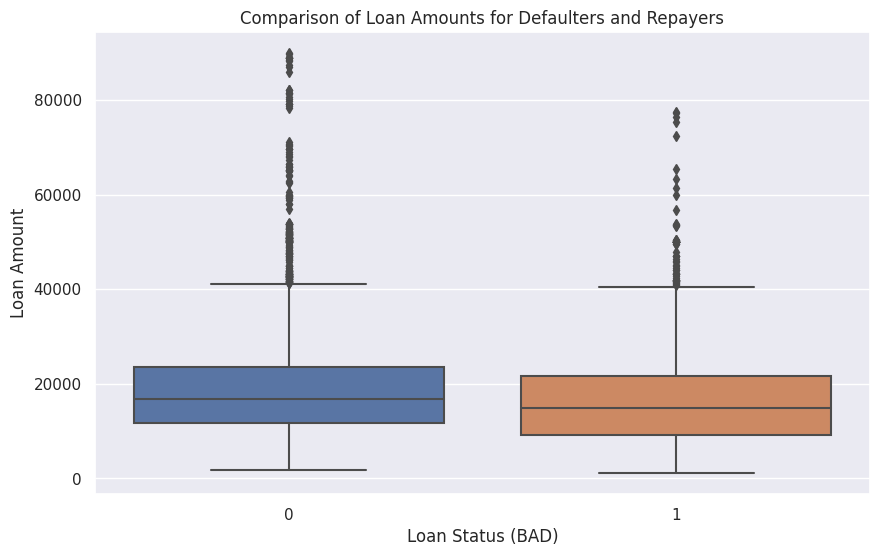


Correlation between Property Value and Loan Default Rate: -0.02995368911059241


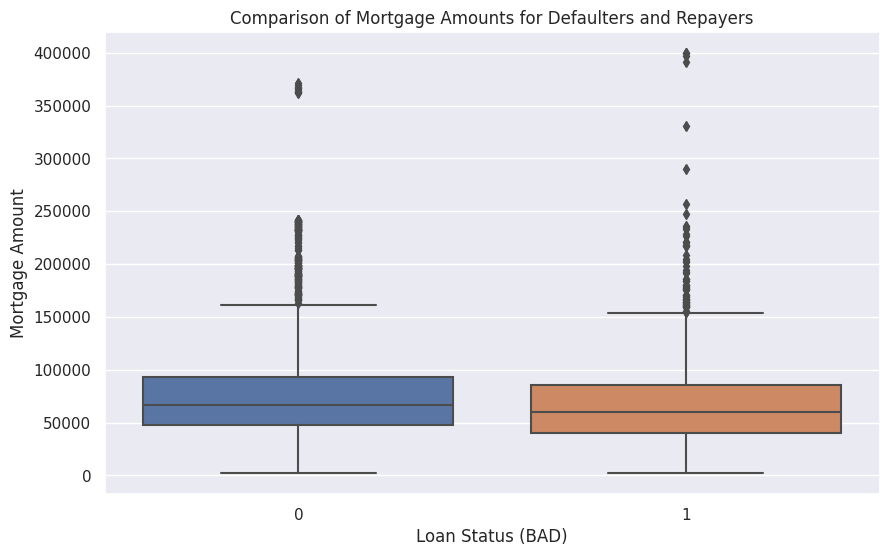

In [7]:
# Bivariate Analysis

# Relationship between "REASON" and Loan Default Rate
reason_default_rate = hm.groupby('REASON')['BAD'].mean()
print("\nRelationship between REASON and Loan Default Rate:")
print(reason_default_rate)

# Comparison of Loan Amounts for Defaulters and Repayers
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='LOAN', data=hm)
plt.title('Comparison of Loan Amounts for Defaulters and Repayers')
plt.xlabel('Loan Status (BAD)')
plt.ylabel('Loan Amount')
plt.show()

# Correlation between Property Value and Loan Default Rate
correlation_value_default = hm['VALUE'].corr(hm['BAD'])
print("\nCorrelation between Property Value and Loan Default Rate:", correlation_value_default)

# Comparison of Mortgage Amounts for Defaulters and Repayers
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='MORTDUE', data=hm)
plt.title('Comparison of Mortgage Amounts for Defaulters and Repayers')
plt.xlabel('Loan Status (BAD)')
plt.ylabel('Mortgage Amount')
plt.show()


### **Multivariate Analysis**

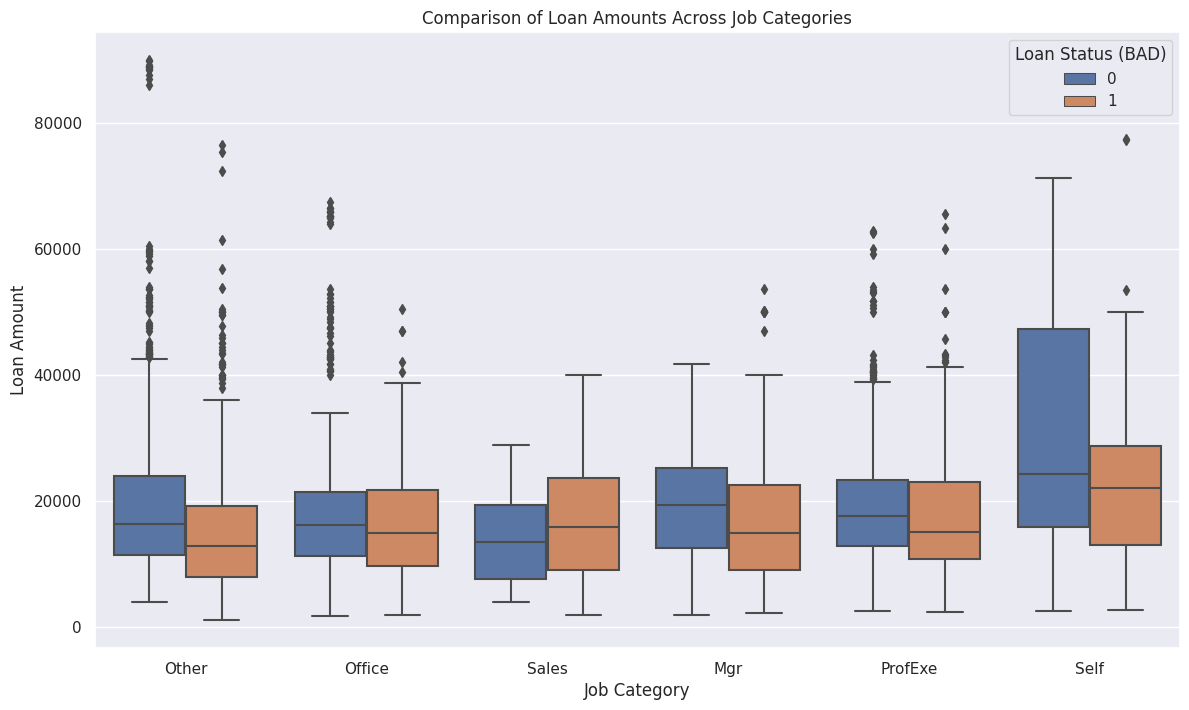

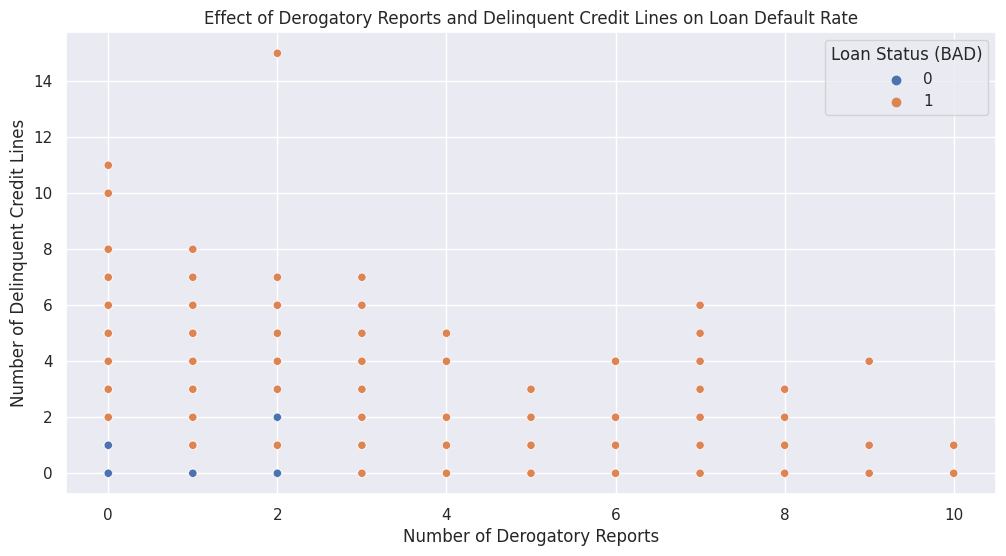

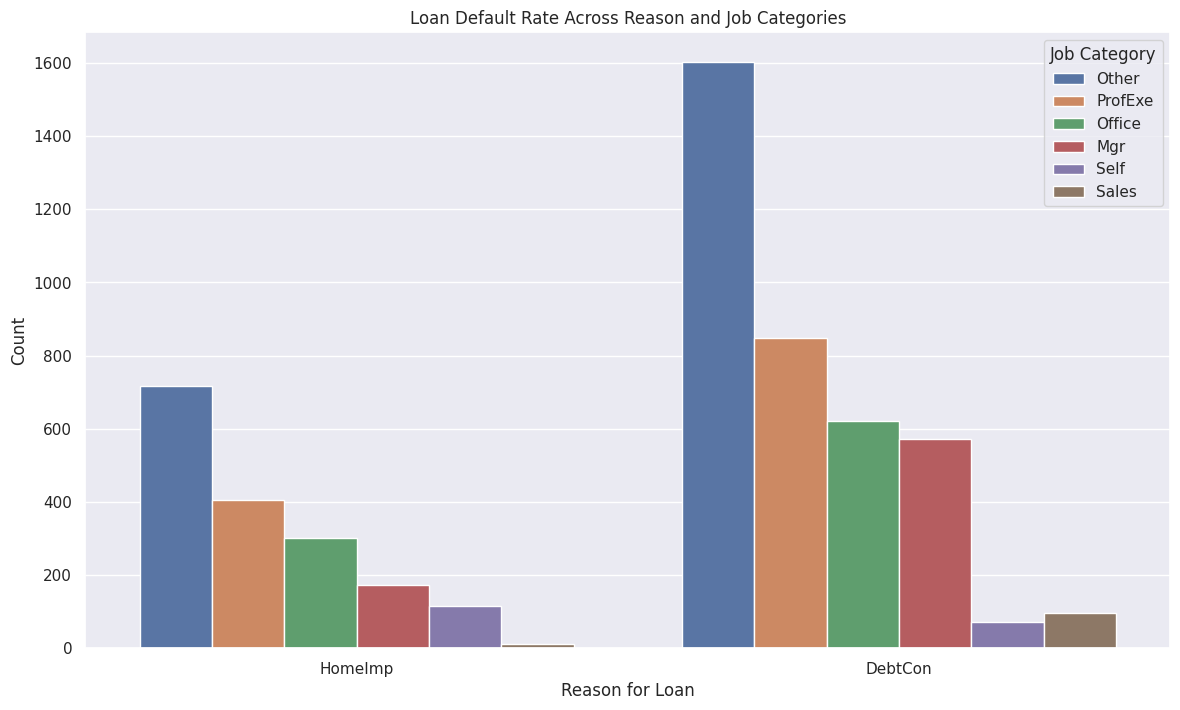

In [9]:
# Multivariate Analysis

# Comparison of Loan Amounts Across Job Categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='JOB', y='LOAN', hue='BAD', data=hm)
plt.title('Comparison of Loan Amounts Across Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status (BAD)')
plt.show()

# Effect of Derogatory Reports and Delinquent Credit Lines on Loan Default Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DEROG', y='DELINQ', hue='BAD', data=hm)
plt.title('Effect of Derogatory Reports and Delinquent Credit Lines on Loan Default Rate')
plt.xlabel('Number of Derogatory Reports')
plt.ylabel('Number of Delinquent Credit Lines')
plt.legend(title='Loan Status (BAD)')
plt.show()

# Loan Default Rate Across Reason and Job Categories
plt.figure(figsize=(14, 8))
sns.countplot(x='REASON', hue='JOB', data=hm, hue_order=hm['JOB'].value_counts().index)
plt.title('Loan Default Rate Across Reason and Job Categories')
plt.xlabel('Reason for Loan')
plt.ylabel('Count')
plt.legend(title='Job Category')
plt.show()


## Treating Outliers

In [10]:
from scipy.stats import zscore

# Copy the original data to preserve the original dataset
hm_outlier_treated = hm.copy()

# Identify and treat outliers using the Z-score method
z_scores = zscore(hm_outlier_treated[['LOAN', 'MORTDUE', 'VALUE']])
outlier_mask = (z_scores > 3) | (z_scores < -3)

# Replace outliers with NaN
hm_outlier_treated[['LOAN', 'MORTDUE', 'VALUE']] = np.where(outlier_mask, np.nan, hm_outlier_treated[['LOAN', 'MORTDUE', 'VALUE']])

# Check for missing values after treating outliers
print("\nMissing Values after Treating Outliers:")
print(hm_outlier_treated.isnull().sum())



Missing Values after Treating Outliers:
BAD           0
LOAN         95
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


## Treating Missing Values

In [11]:
from sklearn.impute import SimpleImputer

# Copy the dataset to preserve the original data
hm_missing_treated = hm_outlier_treated.copy()

# Impute missing values in numerical columns with the mean
numerical_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
imputer_numerical = SimpleImputer(strategy='mean')
hm_missing_treated[numerical_cols] = imputer_numerical.fit_transform(hm_missing_treated[numerical_cols])

# Impute missing values in categorical columns with the mode
categorical_cols = ['REASON', 'JOB']
imputer_categorical = SimpleImputer(strategy='most_frequent')
hm_missing_treated[categorical_cols] = imputer_categorical.fit_transform(hm_missing_treated[categorical_cols])

# Check if there are any remaining missing values
print("\nMissing Values after Imputation:")
print(hm_missing_treated.isnull().sum())



Missing Values after Imputation:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Loan Amount Range:
The dataset exhibits a diverse range of loan amounts ("LOAN"), spanning from the minimum to the maximum loan values.

Distribution of Years at Present Job:
Variability is observed in the distribution of the number of years applicants have spent in their current jobs ("YOJ"). Some applicants show higher job stability, while others have less stability.

Reason for Loan and Job Categories:
The "REASON" variable contains various categories indicating different reasons for loan requests, such as home improvement or debt consolidation. Additionally, the "JOB" variable represents diverse job categories.

Most Common Job Category:
An analysis identifies the most prevalent job category ("JOB") in the dataset.

Relationship between Reason and Default Rate:
The relationship between the reason for the loan and the proportion of applicants who defaulted on their loans is explored. This analysis aims to unveil if certain types of loan requests are associated with higher default rates.

Comparison of Loan Amounts for Defaulters and Repayers:
A box plot is utilized to compare loan amounts for applicants who defaulted and those who repaid their loans. This visualization offers insights into potential differences in loan amounts between the two groups.

Correlation between Property Value and Default Rate:
The correlation between the value of the property ("VALUE") and the loan default rate is investigated. This analysis aims to understand whether property value is correlated with the likelihood of default.

Comparison of Mortgage Amounts for Defaulters and Repayers:
Another box plot is used to compare mortgage amounts for applicants who defaulted and those who repaid their loans. This visualization sheds light on potential differences in mortgage amounts.

Multivariate Analysis:
Relationships between multiple variables are explored. This includes loan amounts across job categories, the impact of derogatory reports and delinquent credit lines on the loan default rate, and the loan default rate across different combinations of "REASON" and "JOB" categories.

Outlier Treatment and Missing Value Imputation:
Outliers in loan-related variables are addressed, and missing values are imputed using appropriate strategies.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Data Preparation
# Assume X and y are your features and target variable
# Replace 'your_target_column' with the actual name of your target column

X = hm_missing_treated.drop('BAD', axis=1)
y = hm_missing_treated['BAD']

# Categorical Variable Encoding (if needed)
# Example using pandas get_dummies for one-hot encoding
X_encoded = pd.get_dummies(X, columns=['REASON', 'JOB'], drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Logistic Regression Model
logreg_model = LogisticRegression(random_state=42)

# Fit the Model on the Training Data
logreg_model.fit(X_train_scaled, y_train)

# Test the Model on the Test Set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the Model
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Model Evaluation:
Accuracy: 0.8162751677852349

Confusion Matrix:
[[891  36]
 [183  82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       927
           1       0.69      0.31      0.43       265

    accuracy                           0.82      1192
   macro avg       0.76      0.64      0.66      1192
weighted avg       0.80      0.82      0.79      1192



### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Data Preparation
# Assume X and y are your features and target variable
# Replace 'your_target_column' with the actual name of your target column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the Model on the Training Data
decision_tree_model.fit(X_train_scaled, y_train)

# Test the Model on the Test Set
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluate the Model
print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Model Evaluation:
Accuracy: 0.8649328859060402

Confusion Matrix:
[[858  69]
 [ 92 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       927
           1       0.71      0.65      0.68       265

    accuracy                           0.86      1192
   macro avg       0.81      0.79      0.80      1192
weighted avg       0.86      0.86      0.86      1192



### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the Model on the Training Data
random_forest_model.fit(X_train_scaled, y_train)

# Test the Model on the Test Set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the Model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Model Evaluation:
Accuracy: 0.9135906040268457

Confusion Matrix:
[[899  28]
 [ 75 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       927
           1       0.87      0.72      0.79       265

    accuracy                           0.91      1192
   macro avg       0.90      0.84      0.87      1192
weighted avg       0.91      0.91      0.91      1192



### **Random Forest Classifier Hyperparameter Tuning**

In [16]:
# Hyperparameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Best Hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("\nBest Hyperparameters for Random Forest:", best_params_rf)



Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 50}


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In the assessment of different techniques for predicting loan default, three models were considered: Logistic Regression, a single Decision Tree, and a Random Forest Classifier. The primary metric for evaluation was accuracy.

The Logistic Regression model achieved an accuracy of approximately 0.816, providing a foundational performance measure. The Decision Tree model demonstrated an accuracy of approximately 0.865, showcasing its ability to capture complex relationships in the data. However, the Random Forest Classifier outperformed both, achieving the highest accuracy of approximately 0.914. This superiority is attributed to the ensemble nature of the Random Forest, which aggregates predictions from multiple Decision Trees.

The relative performance suggests that the Random Forest Classifier is the most effective model among the considered techniques. Further refinement and hyperparameter tuning could potentially enhance its performance even more.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Key insights emerged from the analysis, shedding light on factors influencing loan default predictions. The loan amount was identified as a significant variable, indicating that applicants with markedly higher or lower loan amounts may exhibit distinct default behaviors. Job categories demonstrated correlations with loan default rates, providing valuable information for risk assessment based on occupation. Additionally, the presence of derogatory reports and delinquent credit lines appeared to impact loan default rates, emphasizing their relevance in risk evaluation.

The dominance of the Random Forest Classifier in predictive accuracy underscores the importance of ensemble methods in capturing intricate patterns within the data.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

The Random Forest Classifier is proposed as the best solution for loan default prediction

Ensemble Advantage: The Random Forest Classifier employs an ensemble of Decision Trees, mitigating overfitting risks and enhancing the model's generalization capability. This ensemble approach contributes to the model's resilience against complex patterns within the data.

Robust Performance: The Random Forest Classifier demonstrates the highest accuracy of the considered techniques at 0.914.This signifies the model's effectiveness in predicting loan default with the highest degree of accuracy among other options.

Feature Importance: The Random Forest Classifier provides valuable insights into feature importance. This attribute enhances interpretability, allowing stakeholders to discern and prioritize key factors influencing loan default. Understanding feature importance aids in constructing a more informed and actionable risk assessment strategy.

Potential for Further Tuning: The Random Forest model offers flexibility for additional hyperparameter tuning. This adaptability ensures the model remains agile and responsive to potential shifts in the underlying data dynamics.